In [24]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df_orders = pd.read_csv('./Orders.csv')
df_returns = pd.read_csv('./Returns.csv')

In [4]:
df_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [5]:
df_returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [71]:
df_returns.columns

Index(['Returned', 'Order ID', 'Region'], dtype='object')

Problem 1: Dataset Import & Cleaning
Check “Profit” and “Sales” in the dataset, convert these two columns to numeric type.

In [6]:
df_orders.Sales = df_orders.Sales.apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [7]:
df_orders.Profit = df_orders.Profit.apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [8]:
df_orders.columns = df_orders.columns.str.replace('.', '_')
df_orders.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

In [9]:
df_orders.Order_Date = pd.to_datetime(df_orders.Order_Date)

In [42]:
df_orders.index = df_orders.Order_Date
df_orders.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
Order_Date,,,,,,,,,,,,,,,,,,,,,
2014-11-11,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
2014-02-05,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2014-10-17,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
2014-01-28,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
2014-11-05,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [45]:
%matplotlib inline
df_date = df_orders[['Quantity']]
df_date.head()

,Quantity
Order_Date,
2014-11-11,2
2014-02-05,9
2014-10-17,9
2014-01-28,5
2014-11-05,8


Problem 2: Inventory Management

He wants you to answer the following questions:
Is there any seasonal trend of inventory in the company?

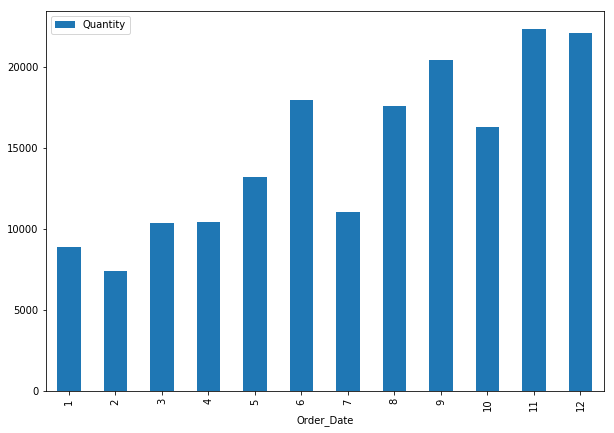

In [46]:
plt.rcParams['figure.figsize'] = 10, 7
df_date.groupby(df_date.index.month).sum().plot(kind='bar')

Is the seasonal trend the same for different categories?

In [48]:
df_cat = df_orders[['Quantity', 'Category']]
df_cat.head()

,Quantity,Category
Order_Date,,
2014-11-11,2,Technology
2014-02-05,9,Furniture
2014-10-17,9,Technology
2014-01-28,5,Technology
2014-11-05,8,Technology


In [59]:
df_cat.groupby([df_cat.index.month, 'Category']).sum().unstack(fill_value=0)

Quantity                           
Category   Furniture Office Supplies Technology
Order_Date                                     
1               1750            5480       1642
2               1494            4340       1595
3               2098            6283       2009
4               2005            6391       2070
5               2484            8170       2542
6               3434           11012       3563
7               2157            6618       2271
8               3059           11019       3518
9               4111           12572       3796
10              3323            9585       3395
11              4471           13529       4379
12              4506           13245       4396

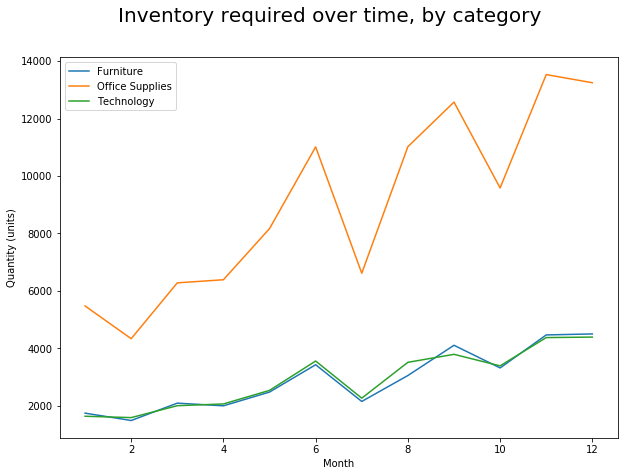

In [68]:
df_cat.groupby([df_cat.index.month, 'Category']).sum().unstack(fill_value=0).plot()
plt.xlabel('Month')
plt.ylabel('Quantity (units)')
plt.suptitle('Inventory required over time, by category', fontsize=20)
L=plt.legend()
L.get_texts()[0].set_text('Furniture')
L.get_texts()[1].set_text('Office Supplies')
L.get_texts()[2].set_text('Technology')

Problem 3: Why did customers make returns?

In [72]:
df_merged = df_orders.merge(df_returns, how = 'left', left_on = 'Order_ID', right_on = 'Order ID', left_index=True)

In [73]:
df_merged.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Order ID,Region_y
1078,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,NaN,NaN,NaN
1078,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,NaN,NaN,NaN
1078,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,NaN,NaN,NaN
1078,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,NaN,NaN,NaN
1078,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,NaN,NaN,NaN


In [175]:
df_merged.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'Returned', 'Order ID',
       'Region_y'],
      dtype='object')

In [78]:
df_merged.Returned = df_merged.Returned.replace(np.nan, 'No')
df_merged.Returned.unique()

array(['No', 'Yes'], dtype=object)

In [82]:
df_merged.index = df_merged.Order_Date

1. How much profit did we lose due to returns each year?

In [87]:
df_merged.groupby([df_merged.index.year, 'Returned'])[['Profit']].sum()

Profit
Order_Date Returned           
2012       No        231463.09
           Yes        17477.26
2013       No        298145.44
           Yes         9269.89
2014       No        389424.26
           Yes        17510.63
2015       No        487053.13
           Yes        17112.97

2. How many customer returned more than once? more than 5 times?

In [111]:
returners = df_merged.loc[(df_merged.Returned == 'Yes')].groupby("Customer_ID").size()

print(str(returners[returners > 1].size) + ' customers have made multiple returns')

print(str(returners[returners > 5].size) + " customers have made more than 5 returns")

547 customers have made multiple returns
46 customers have made more than 5 returns


3. Which regions are more likely to return orders?

In [174]:
return_region = df_merged[['Region_x', 'Returned', 'Order_ID']].groupby(['Region_x', 'Returned']).count()
return_region = return_region.reset_index(level=["Returned"])

total = return_region.groupby('Region_x').sum()
final = return_region.merge(total, how='left', on='Region_x')
final = final.loc[final.Returned == 'Yes']
final.columns = ['Returned', 'Orders_Returned', 'Total_Orders']
final.index.names = ['Region']
final = final[['Orders_Returned', 'Total_Orders']]
final["Pct_Returned"] = final.Orders_Returned / final.Total_Orders * 100
final.iloc[:,1:4].sort_values(by="Pct_Returned", ascending = False)

,Total_Orders,Pct_Returned
Region,,
Western US,3203,5.526069
Eastern Asia,2374,5.518113
Southern Europe,2113,5.300521
Southern Africa,478,5.230126
Southern US,1620,5.123457
Eastern US,2848,4.705056
Southeastern Asia,3129,4.474273
South America,2988,4.451138
Western Asia,2440,4.426230


In [197]:
df_returns.rename(columns={'Order ID':'Order_ID'}, inplace=True)
detReturned = pd.merge(df_orders, df_returns[["Order_ID"]], on = "Order_ID")
detReturned = detReturned.set_index("Order_Date")

4. Which categories (sub-categories) of products are more likely to be returned?

In [204]:
(detReturned.groupby("Sub_Category").size() / df_orders.groupby("Sub_Category").size()).sort_values()

Sub_Category
Appliances     0.033869
Fasteners      0.039216
Envelopes      0.041475
Storage        0.041989
Machines       0.042396
Supplies       0.042792
Furnishings    0.042803
Chairs         0.042807
Paper          0.042955
Bookcases      0.043136
Phones         0.043193
Binders        0.043768
Copiers        0.044534
Art            0.044613
Accessories    0.044878
Tables         0.047619
Labels         0.052672
dtype: float64